In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

dt_clf = DecisionTreeClassifier(random_state=156)

iris=load_iris()
x_train,x_test,y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=11)
dt_clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=156,
            splitter='best')

In [2]:
dt_clf = DecisionTreeClassifier(random_state=11)

In [16]:
!pip install graphviz

In [10]:
from sklearn.tree import export_graphviz

export_graphviz(dt_clf,out_file='C:/Users/dkfka/tree.dot', class_names = iris.target_names, feature_names= iris.feature_names, impurity=True, filled=True)


In [17]:
import graphviz

with open("C:/Users/dkfka/tree.dot")as f:
    dot_graph = f.read()
    
graphviz.Source(dot_graph)
    


ModuleNotFoundError: No module named 'graphviz'

In [7]:
!pip install seaborn

Feature importances:
[0.025 0.    0.555 0.42 ]
sepal length (cm):0.025
sepal width (cm):0.000
petal length (cm):0.555
petal width (cm):0.420


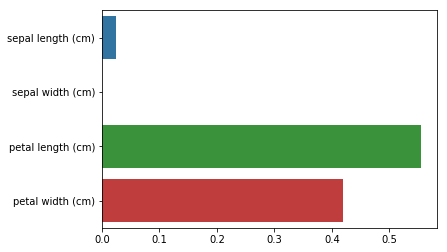

In [18]:
import seaborn as sns
import numpy as np
%matplotlib inline

print("Feature importances:\n{0}".format(np.round(dt_clf.feature_importances_,3)))

for name, value in zip(iris.feature_names, dt_clf.feature_importances_):
    print('{0}:{1:.3f}'.format(name,value))
sns.barplot(x=dt_clf.feature_importances_,y=iris.feature_names)

#output각 값들이 미치는 중요도 를 나타냄 꽃의 품종을 구별하는 중요도!!

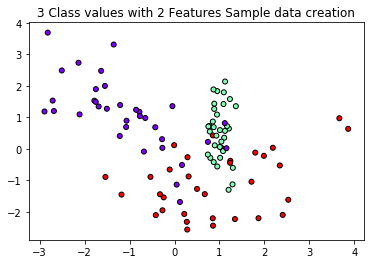

In [21]:
#결정트리 오버핏(과적합) 시각화

from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline

plt.title("3 Class values with 2 Features Sample data creation")
#2차원 시각화를 위해 피쳐는 2개 클래스는 3개로 
x_features, y_labels = make_classification(n_features=2, n_redundant=0,
                                                                     n_informative=2, n_classes=3,
                                                                     n_clusters_per_class=1,
                                                                     random_state=0)

plt.scatter(x_features[:, 0], x_features[:, 1],
                 marker='o', c=y_labels,
                 s=25, cmap='rainbow', edgecolor='k')


In [19]:
# Classifier의 Decision Boundary를 시각화 하는 함수
def visualize_boundary(model, X, y):
    fig,ax = plt.subplots()
    
    # 학습 데이타 scatter plot으로 나타내기
    ax.scatter(X[:, 0], X[:, 1], c=y, s=25, cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    # 호출 파라미터로 들어온 training 데이타로 model 학습 . 
    model.fit(X, y)
    # meshgrid 형태인 모든 좌표값으로 예측 수행. 
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    # contourf() 를 이용하여 class boundary 를 visualization 수행. 
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

C:\Users\dkfka\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


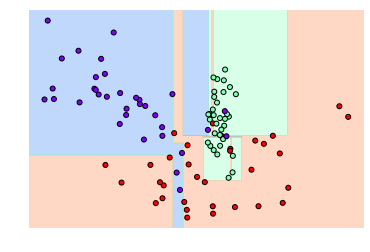

In [25]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier().fit(x_features,y_labels)  #학습이 된 디시전트리  #min_samples_leaf=6 제약조건을 건다.
visualize_boundary(dt_clf,x_features,y_labels)

C:\Users\dkfka\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


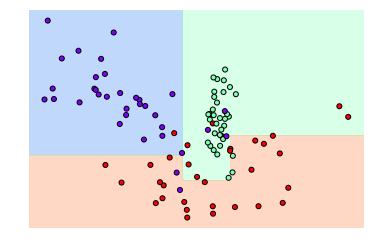

In [26]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(min_samples_leaf=6).fit(x_features,y_labels)  #학습이 된 디시전트리  #min_samples_leaf=6 제약조건을 건다.
visualize_boundary(dt_clf,x_features,y_labels)

C:\Users\dkfka\Anaconda3\lib\site-packages\matplotlib\contour.py:1000: UserWarning: The following kwargs were not used by contour: 'clim'
  s)


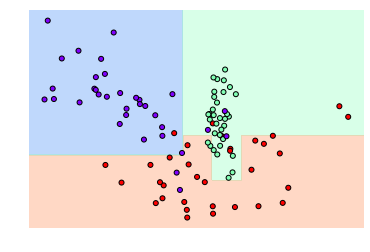

In [27]:
from sklearn.tree import DecisionTreeClassifier
dt_clf= DecisionTreeClassifier(min_samples_leaf=5).fit(x_features,y_labels)  #학습이 된 디시전트리  #min_samples_leaf=6 제약조건을 건다.
visualize_boundary(dt_clf,x_features,y_labels)